In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df_train = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_train.csv', encoding= 'unicode_escape')
df_test = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_test.csv', encoding= 'unicode_escape')

In [3]:
# Pre-processing function
def pre_processing(text):
    text = text.lower()
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]", " ", text)
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stopwords.words("turkish")]
    lemma = nltk.WordNetLemmatizer()
    return " ".join([lemma.lemmatize(word) for word in words])

In [4]:
# Apply pre-processing
df_train["clean_text"] = df_train["comment"].apply(pre_processing)
df_test["clean_text"] = df_test["comment"].apply(pre_processing)

In [5]:
# Data setup
X_train = df_train["clean_text"]
X_test = df_test["clean_text"]
y_train = df_train["Label"]
y_test = df_test["Label"]

In [6]:
# Pipeline and GridSearchCV setup
param_grid = {
    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': ['scale', 'auto']
}
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.1, 1, 10, 100],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [7]:
# Output the best results
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: %.3f" % grid_search.best_score_)
best_model = grid_search.best_estimator_
print("Test accuracy with best model: %.3f" % best_model.score(X_test, y_test))

Best parameters found:  {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best accuracy score found: 0.893
Test accuracy with best model: 0.893


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1333
           1       0.90      0.89      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666



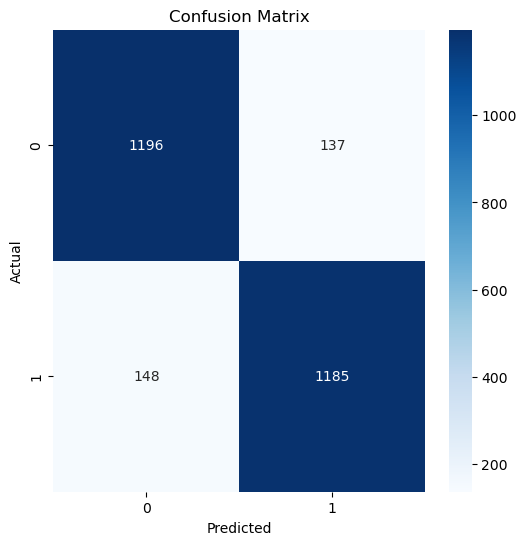

In [8]:
# Predict and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Predictions and evaluation using grid_search
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Train Accuracy : %.3f' % grid_search.score(X_train, y_train))
print('Test Accuracy : %.3f' % grid_search.score(X_test, y_test))
print("Precision Score: %.3f" % precision_score(y_test, y_pred, average='macro'))
print("Recall Score: %.3f" % recall_score(y_test, y_pred, average='macro'))
print("F1 Score: %.3f" % f1_score(y_test, y_pred, average='macro'))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      1333
           1       0.90      0.89      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666

Train Accuracy : 1.000
Test Accuracy : 0.893
Precision Score: 0.893
Recall Score: 0.893
F1 Score: 0.893
